1. As a first step, I will import the required python libraries and the field daily raw production data.

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xlrd==1.2.0
!pip install -U scikit-learn
!pip install XlsxWriter

You should consider upgrading via the 'c:\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
#Import the xls production file using pandas 
prod_df=pd.read_excel('Daily Production.xls')

------------------------------------------------------------------------------------------------------------------------------------------------------

EXPLORATORY DATA ANALYSIS (EDA) 

The EDA is the most overwelhming part of any project because it demands a lot of time to know the data, understand it, find patterns or anomalies using some statistics concepts.

In [4]:
#Knowing the data in general
print(prod_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

This line of code helped me finding out how many columns I have and what are their specific names. Also, what type of values or information I get.

In [5]:
prod_df

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


This is another type of data visualization, pandas converts this dataset into a dataframe. As we can see, there are 15634 rows and 24 columns of data on this file and taking one example, we are able to see a couple of null values in the AVG_DOWNHOLE_PRESSURE column but is possible that I will have more depending of the section of analysis

In [6]:
# Dispersion measures per variable
prod_df.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,5908.581745,3420717.0,369304.0,19.994093,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,11.441060,1095.631548,161049.059703,1672.151332,5315.480815
std,649.231622,0.0,0.0,8.369978,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,19.816928,1323.538151,188136.410434,1706.982853,2181.486695
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,0.000000,190.690000,29430.590000,19.870000,4338.204674
50%,5693.000000,3420717.0,369304.0,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,2.384969,557.550000,87749.660000,1097.790000,5504.739769
75%,5769.000000,3420717.0,369304.0,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,13.765020,1345.200000,202482.300000,3260.950000,6781.058040
max,7405.000000,3420717.0,369304.0,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,10013.600000


With the dispersion measures I am able to calculate statistical values for every variable or column. As we can see, we have the measures for some  values like the mean, standard deviation, minimum and maximum values and quartiles for each variable or column. 

In [7]:
#Correlation analysis between variables 
prod_df.corr()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
NPD_WELL_BORE_CODE,1.000000,NaN,NaN,-0.102270,0.257481,0.339509,0.218243,0.141756,-0.558461,0.077946,-0.519515,0.237647,-0.307645,-0.310793,-0.493591,-0.055894
NPD_FIELD_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPD_FACILITY_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ON_STREAM_HRS,-0.102270,NaN,NaN,1.000000,-0.003092,0.105931,0.002824,0.482779,0.531331,-0.044900,0.763229,-0.229295,0.342031,0.353713,0.405123,0.749544
AVG_DOWNHOLE_PRESSURE,0.257481,NaN,NaN,-0.003092,1.000000,0.967826,0.949734,-0.124023,-0.262804,0.283359,-0.095114,0.267649,0.248571,0.245981,-0.296765,NaN
AVG_DOWNHOLE_TEMPERATURE,0.339509,NaN,NaN,0.105931,0.967826,1.000000,0.898954,-0.087189,-0.295764,0.274247,-0.076801,0.221986,0.289819,0.287328,-0.343581,NaN
AVG_DP_TUBING,0.218243,NaN,NaN,0.002824,0.949734,0.898954,1.000000,-0.110382,-0.162100,0.102476,-0.054496,0.093282,0.126964,0.125475,-0.171882,NaN
AVG_ANNULUS_PRESS,0.141756,NaN,NaN,0.482779,-0.124023,-0.087189,-0.110382,1.000000,0.155142,-0.003255,0.316138,-0.178271,-0.025095,-0.028252,0.094019,NaN
AVG_CHOKE_SIZE_P,-0.558461,NaN,NaN,0.531331,-0.262804,-0.295764,-0.162100,0.155142,1.000000,-0.398607,0.752825,-0.551193,0.029671,0.039699,0.760294,NaN
AVG_WHP_P,0.077946,NaN,NaN,-0.044900,0.283359,0.274247,0.102476,-0.003255,-0.398607,1.000000,-0.041366,0.908623,0.430498,0.428589,-0.328853,NaN


Having a correlation matrix, I am to visualize how strong are these variables correlated between them. We can actually plot this in a heatmap using the seaborn library to determine what variables could be part of the final dataset that will be use for the machine learning algorithms later on. 

In [8]:
#Printing the NPD NAME and CODE per well
print(prod_df['NPD_WELL_BORE_NAME'].value_counts())
print(prod_df['NPD_WELL_BORE_CODE'].value_counts())

15/9-F-4       3327
15/9-F-5       3306
15/9-F-14      3056
15/9-F-12      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64
5693    3327
5769    3306
5351    3056
5599    3056
7078    1165
7289     978
7405     746
Name: NPD_WELL_BORE_CODE, dtype: int64


These lines of code represent the wells NPD names and Codes that was actually given by the Norwegian Petroleum Directory to each of them in order to recognize the wells easier. Two columns appear for each line of code, those are the well name and the npd code themselves and next to it the range of rows occupied by some type of data, which is the same for both variables.

In [9]:
#Extracting information per well using the NPD code
well1=prod_df['NPD_WELL_BORE_CODE']==5693
well2=prod_df['NPD_WELL_BORE_CODE']==5769
well3=prod_df['NPD_WELL_BORE_CODE']==5351
well4=prod_df['NPD_WELL_BORE_CODE']==5599
well5=prod_df['NPD_WELL_BORE_CODE']==7078
well6=prod_df['NPD_WELL_BORE_CODE']==7289
well7=prod_df['NPD_WELL_BORE_CODE']==7405
prod_df_well1=prod_df[well1]
prod_df_well2=prod_df[well2]
prod_df_well3=prod_df[well3]
prod_df_well4=prod_df[well4]
prod_df_well5=prod_df[well5]
prod_df_well6=prod_df[well6]
prod_df_well7=prod_df[well7]
print(prod_df_well1.info(), prod_df_well2.info(), prod_df_well3.info(), prod_df_well4.info(), prod_df_well5.info(), prod_df_well6.info(), prod_df_well7.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3327 entries, 9001 to 12327
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3327 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3327 non-null   object        
 2   NPD_WELL_BORE_CODE        3327 non-null   int64         
 3   NPD_WELL_BORE_NAME        3327 non-null   object        
 4   NPD_FIELD_CODE            3327 non-null   int64         
 5   NPD_FIELD_NAME            3327 non-null   object        
 6   NPD_FACILITY_CODE         3327 non-null   int64         
 7   NPD_FACILITY_NAME         3327 non-null   object        
 8   ON_STREAM_HRS             3175 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     0 non-null      float64       
 10  AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64       
 11  AVG_DP_TUBING             0 non-null      float64       
 12  AVG_ANNULUS_PRES

On this step, I printed information for each well using the NPD code. As we can see, each well has a number of rows used in the original dataset, meaning that we can just substract the number of non-null values from the number of rows covered to have a better idea of how many null values we will get on each specific column. 

In [10]:
#Creating a function using Empirical Cummulative Distribution Function to plot the Oil Production of every well during its lifetime
plt.style.use('ggplot')
def ecdf(OilProd):
    n = len(OilProd)
    x = np.sort(OilProd)
    y = np.arange(1,n+1)/n
    return x,y

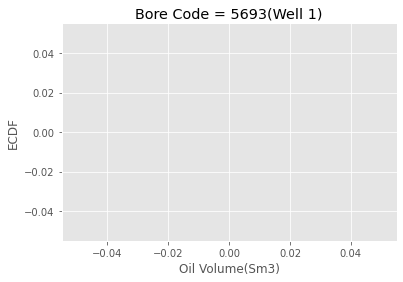

In [11]:
# Plotting Oil Production for WELL 1
x_axis, y_axis = ecdf(prod_df_well1['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5693(Well 1)')

plt.show()

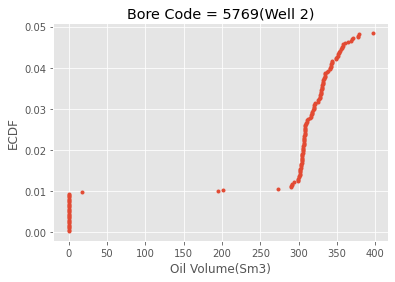

In [12]:
# Plotting Oil Production for WELL 2
x_axis, y_axis = ecdf(prod_df_well2['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5769(Well 2)')

plt.show()

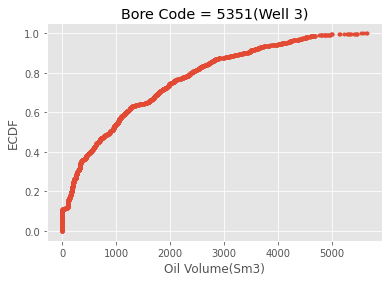

In [13]:
# Plotting Oil Production for WELL 3
x_axis, y_axis = ecdf(prod_df_well3['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5351(Well 3)')

plt.show()

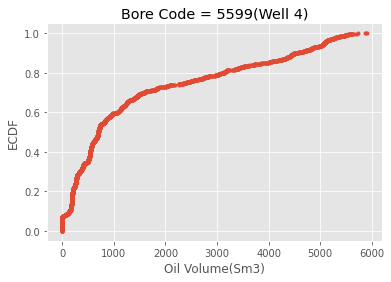

In [14]:
# Plotting Oil Production for WELL 4
x_axis, y_axis = ecdf(prod_df_well4['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5599(Well 4)')

plt.show()

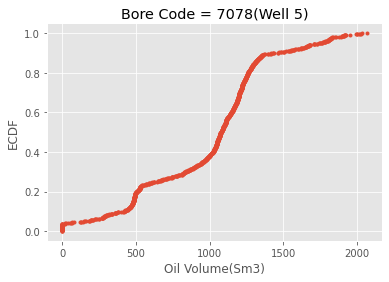

In [15]:
# Plotting Oil Production for WELL 5
x_axis, y_axis = ecdf(prod_df_well5['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7078(Well 5)')

plt.show()

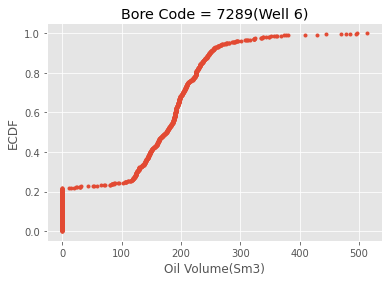

In [16]:
# Plotting Oil Production for WELL 6
x_axis, y_axis = ecdf(prod_df_well6['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7289(Well 6)')

plt.show()

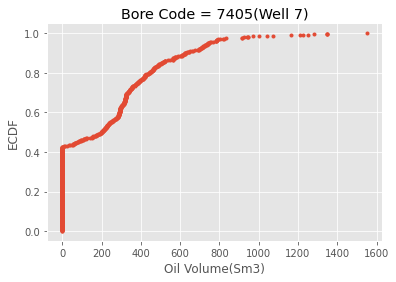

In [17]:
# Plotting Oil Production for WELL 7
x_axis, y_axis = ecdf(prod_df_well7['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7405(Well 7)')

plt.show()

EXPLANATION BASED ON THE ECDF VS OIL VOLUME GRAPH

Well 1: This well doesn't have any curve on it, meaning that is not an oil producer. I can conclude for now that it was a potential water injection well.

Well 2: This well in particular has two curves, meaning that it did not produce oil for a long time until it was put on production for a short period. I can conclude for now that this well was use for water injection, at least for a long time of its life.

Well 3: This was a production well according to the curve.

Well 4: This was a production well according to the curve

Well 5: This was a production well with less than 5% of its data with zero production.

Well 6: This was a production well but more than 20% of its data showed zero production.

Well 7: This was a production well but more than 40% of its data showed zero production.

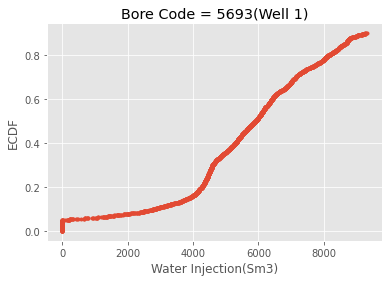

In [18]:
#Plotting Water injection for Well 1
x_axis, y_axis = ecdf(prod_df_well1['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5693(Well 1)')

plt.show()

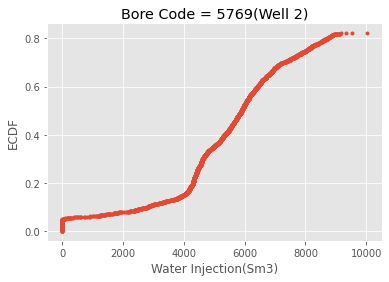

In [19]:
#Plotting Water injection for Well 2
x_axis, y_axis = ecdf(prod_df_well2['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5769(Well 2)')

plt.show()

#EXPLATION BASED ON ECDF VS WATER INJECTION GRAPH 

As I assumed above, Wells 1 and 2 were drilled for water injection purposes. In the case of well 2, it was used more of its lifetime to inject water to the reservoir but 4 months before that the well would be abbandoned, it was put on production until the company closed its operations.

In [20]:
# Plotting Heatmaps for correlation visualization between columns with numerical quantities
prod_df1=prod_df.select_dtypes(include='float')
print(prod_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             15349 non-null  float64
 1   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 3   AVG_DP_TUBING             8980 non-null   float64
 4   AVG_ANNULUS_PRESS         7890 non-null   float64
 5   AVG_CHOKE_SIZE_P          8919 non-null   float64
 6   AVG_WHP_P                 9155 non-null   float64
 7   AVG_WHT_P                 9146 non-null   float64
 8   DP_CHOKE_SIZE             15340 non-null  float64
 9   BORE_OIL_VOL              9161 non-null   float64
 10  BORE_GAS_VOL              9161 non-null   float64
 11  BORE_WAT_VOL              9161 non-null   float64
 12  BORE_WI_VOL               5706 non-null   float64
dtypes: float64(13)
memory usage: 1.6 MB
None


<AxesSubplot:>

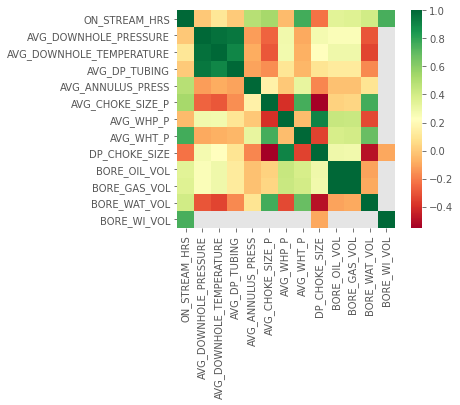

In [21]:
sns.heatmap(prod_df1.corr(), square=True, cmap='RdYlGn')

The heatmap is representing a strong correlation between average downhole temperature, pressure and DP tubing. Also, it is a strong correlation between OIL and GAS production. 

<AxesSubplot:xlabel='NPD_WELL_BORE_CODE', ylabel='BORE_WI_VOL'>

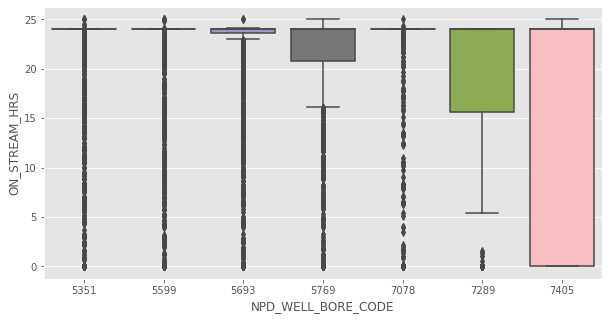

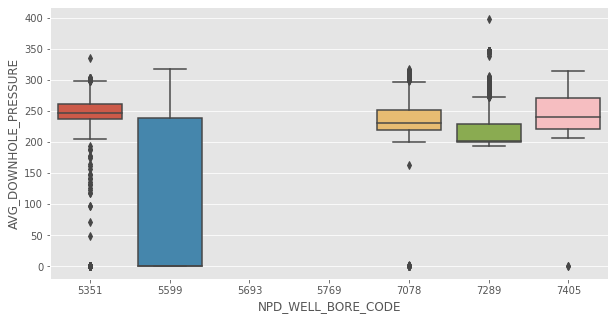

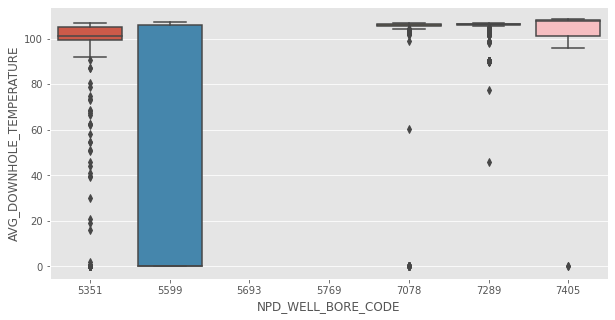

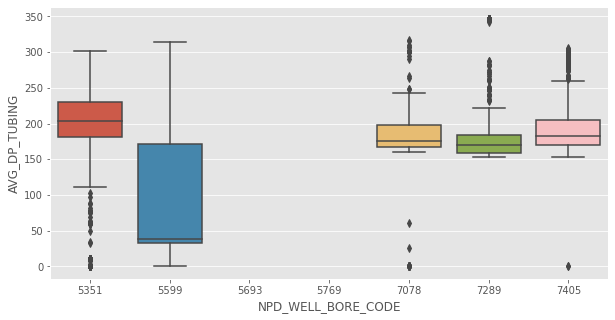

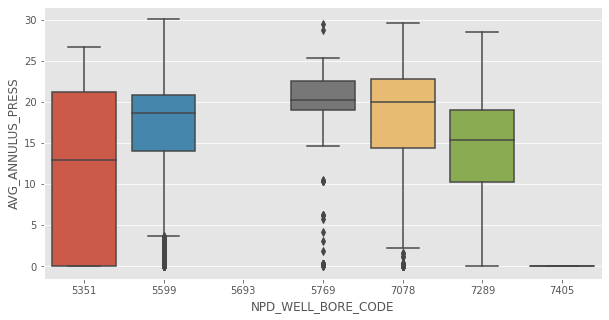

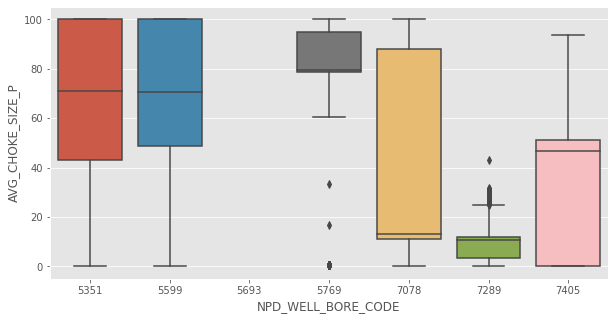

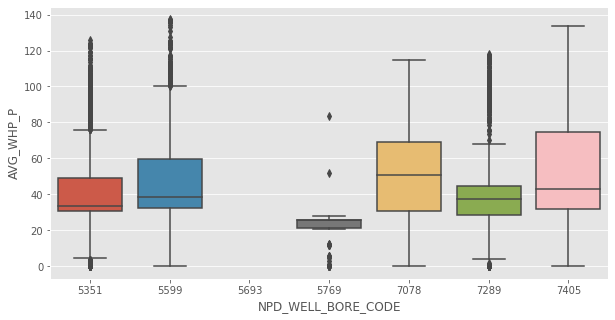

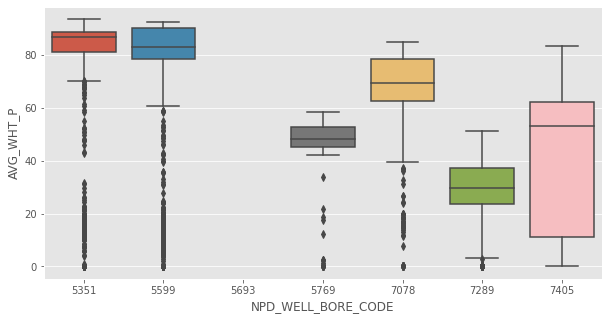

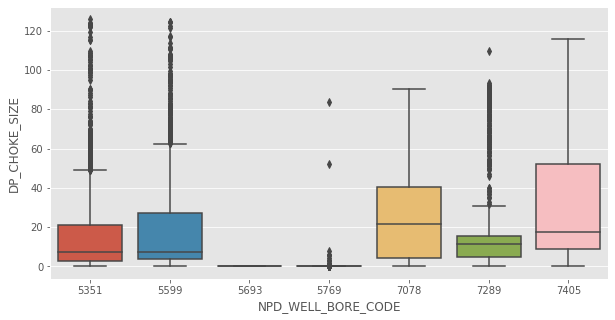

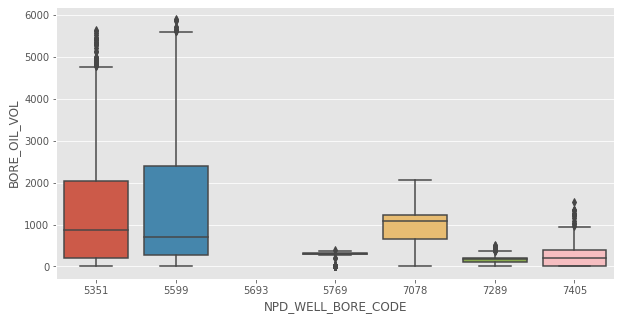

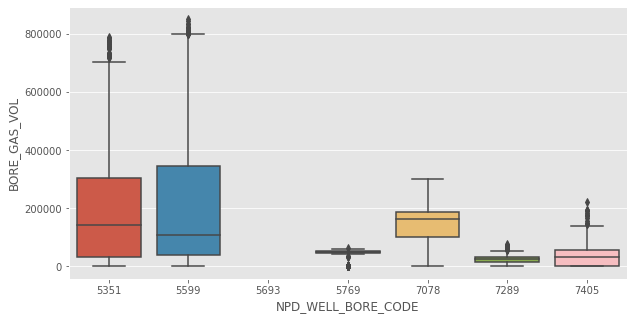

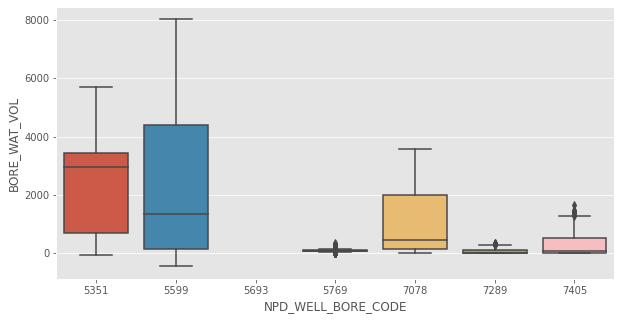

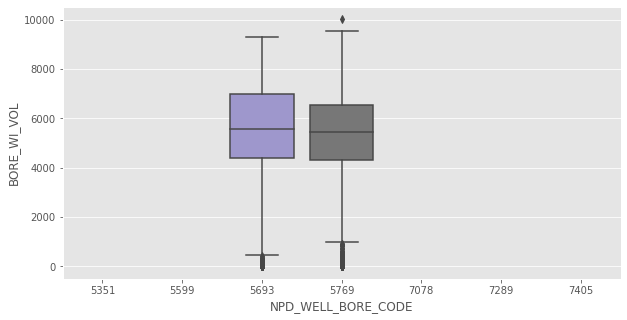

In [22]:
#Plotting boxplots for the visualization of the data distribution
figuresizes = (10,5)
plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'ON_STREAM_HRS', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_PRESSURE', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_TEMPERATURE', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DP_TUBING', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_ANNULUS_PRESS', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_CHOKE_SIZE_P', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHP_P', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHT_P', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'DP_CHOKE_SIZE', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_OIL_VOL', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_GAS_VOL', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_WAT_VOL', data=prod_df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_WI_VOL', data=prod_df)

------------------------------------------------------------------------------------------------------------------------------------------------------